In [2]:
import pandas as pd
import nltk
from langdetect import detect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
df2 = pd.read_excel('AI_Engineer_Dataset_Task_1.xlsx')
df = df2.dropna(subset=['ParticipantResponse'])

# To remove arabic feedback
df = df[df['ParticipantResponse'].map(lambda x: x.isascii())]

df.tail()

,AcademicYear,SemesterName,ParticipantID,DegreeLevel,Gender,Nationality,StudentProgram,CourseCode,CourseName,QuestionText,QuestionType,ParticipantResponse
180963,2021,Spring 2021 - 2022,6724000467,Bachelor,Male,United Arab Emirates,Bachelor of Arts in Security and Strategic Stu...,TOL 200,Tolerance and Diversity,CLO : apply lessons from diversity and toleran...,Rating,Strongly Agree
180965,2021,Spring 2021 - 2022,6724000467,Bachelor,Male,United Arab Emirates,Bachelor of Arts in Security and Strategic Stu...,TOL 200,Tolerance and Diversity,CLO : analyze the relationship between diversi...,Rating,Agree
180966,2022,Fall 2022 - 2023,6373669933,Bachelor,Male,United Kingdom,Bachelor of Business Administration,TOL 200,Tolerance and Diversity,The faculty discussed the course syllabus at t...,Rating,Strongly Agree
180967,2022,Fall 2022 - 2023,6373669933,Bachelor,Male,United Kingdom,Bachelor of Business Administration,TOL 200,Tolerance and Diversity,The coursework and assignments are challenging,Rating,Strongly Agree
180968,2022,Fall 2022 - 2023,6373669933,Bachelor,Male,United Kingdom,Bachelor of Business Administration,TOL 200,Tolerance and Diversity,The course is relevant to my program of study,Rating,Strongly Agree


In [5]:
#Data Processing Function
def preprocess_text(text):
    #lowercase
    text = text.lower()
    #punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))   
    #Tokenize the text
    tokens = word_tokenize(text)
    #stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a text string
    preprocessed_text = ' '.join(filtered_tokens)
    
    return preprocessed_text

In [6]:

#preprocessing ParticipantResponse
df['ParticipantResponse'] = df['ParticipantResponse'].astype(str).apply(preprocess_text)

In [7]:
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'


In [8]:
df['Sentiment'] = df['ParticipantResponse'].apply(get_sentiment)

In [10]:
#summary statistics

sentiment_counts = df['Sentiment'].value_counts()

sentiment_percentages = (sentiment_counts / len(df)) * 100

summary_df = pd.DataFrame({'Sentiment': sentiment_counts.index, 'Count': sentiment_counts.values, 'Percentage': sentiment_percentages.values})
print(summary_df)


  Sentiment   Count  Percentage
0  positive  123621   73.739308
1  negative   23706   14.140510
2   neutral   20319   12.120182


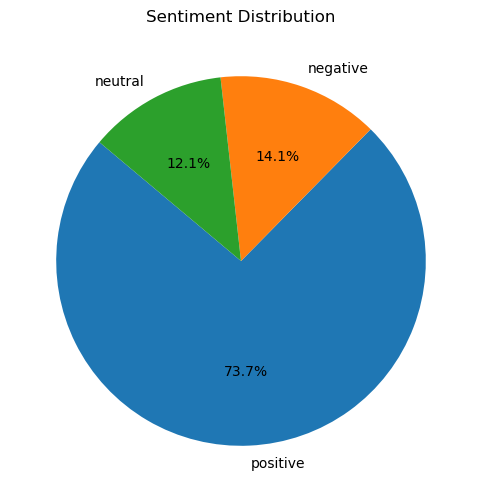

In [11]:
# Create a pie chart for sentiment distribution
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


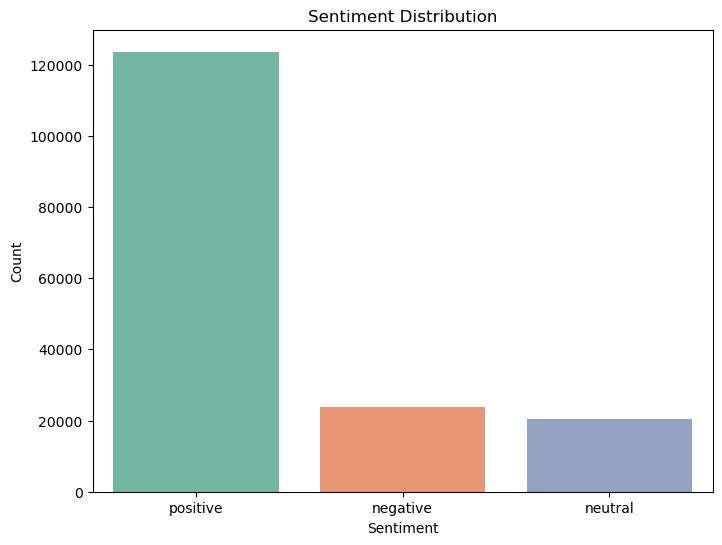

In [12]:
# Create a bar chart for sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

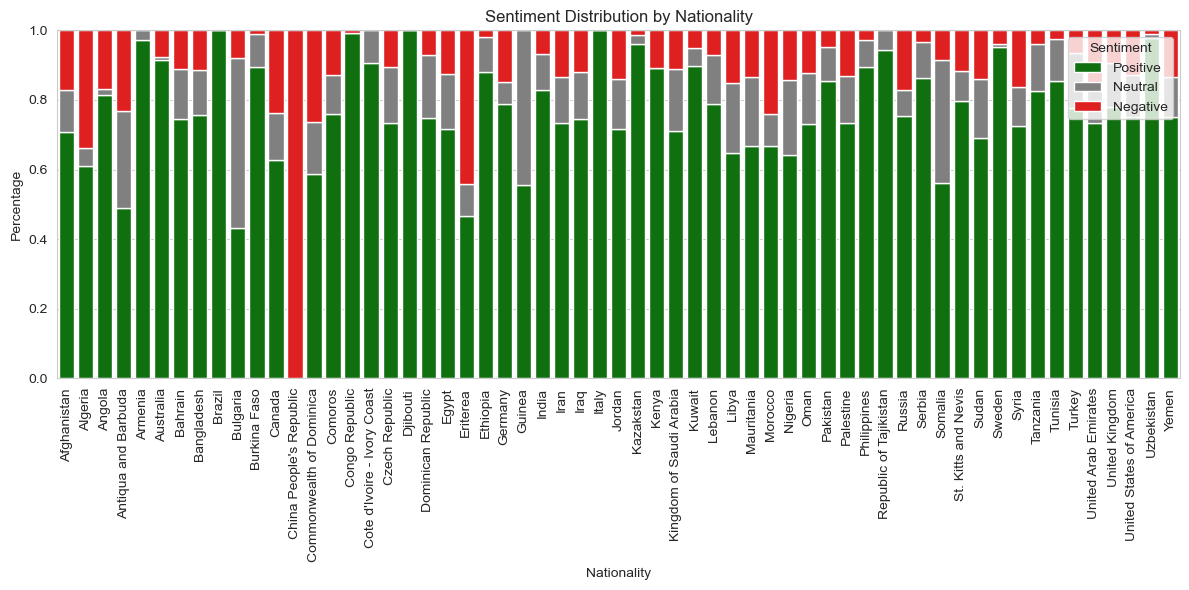

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' with 'Nationality' and 'Sentiment_TextBlob' columns

# Group the data by 'Nationality' and calculate sentiment statistics
sentiment_by_nationality = df.groupby('Nationality')['Sentiment'].value_counts(normalize=True).unstack(fill_value=0)

# Reset the index to make 'Nationality' a column again
sentiment_by_nationality = sentiment_by_nationality.reset_index()

# Set up the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a stacked bar chart
sns.barplot(data=sentiment_by_nationality, x='Nationality', y='positive', label='Positive', color='green')
sns.barplot(data=sentiment_by_nationality, x='Nationality', y='neutral', label='Neutral', color='gray', bottom=sentiment_by_nationality['positive'])
sns.barplot(data=sentiment_by_nationality, x='Nationality', y='negative', label='Negative', color='red', bottom=sentiment_by_nationality['neutral'] + sentiment_by_nationality['positive'])

# Customize the plot
plt.xlabel('Nationality')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution by Nationality')
plt.legend(title='Sentiment', loc='upper right')

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

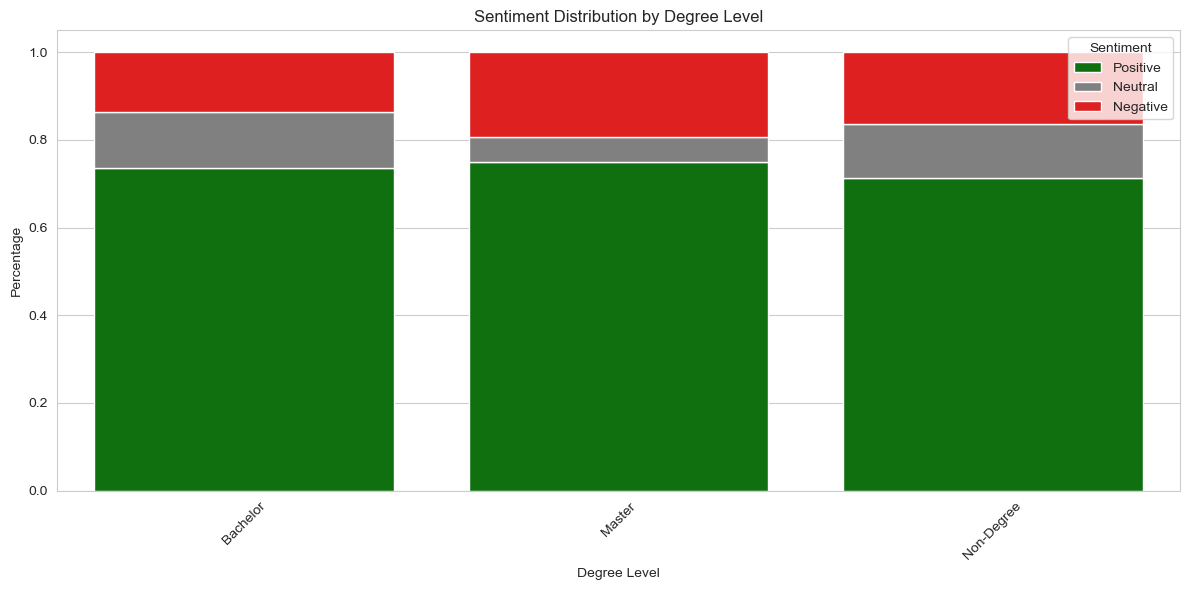

In [14]:
# Group the data by 'DegreeLevel' and calculate sentiment statistics
sentiment_by_degree = df.groupby('DegreeLevel')['Sentiment'].value_counts(normalize=True).unstack(fill_value=0)

# Reset the index to make 'DegreeLevel' a column again
sentiment_by_degree = sentiment_by_degree.reset_index()

# Set up the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a stacked bar chart
sns.barplot(data=sentiment_by_degree, x='DegreeLevel', y='positive', label='Positive', color='green')
sns.barplot(data=sentiment_by_degree, x='DegreeLevel', y='neutral', label='Neutral', color='gray', bottom=sentiment_by_degree['positive'])
sns.barplot(data=sentiment_by_degree, x='DegreeLevel', y='negative', label='Negative', color='red', bottom=sentiment_by_degree['neutral'] + sentiment_by_degree['positive'])

# Customize the plot
plt.xlabel('Degree Level')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution by Degree Level')
plt.legend(title='Sentiment', loc='upper right')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

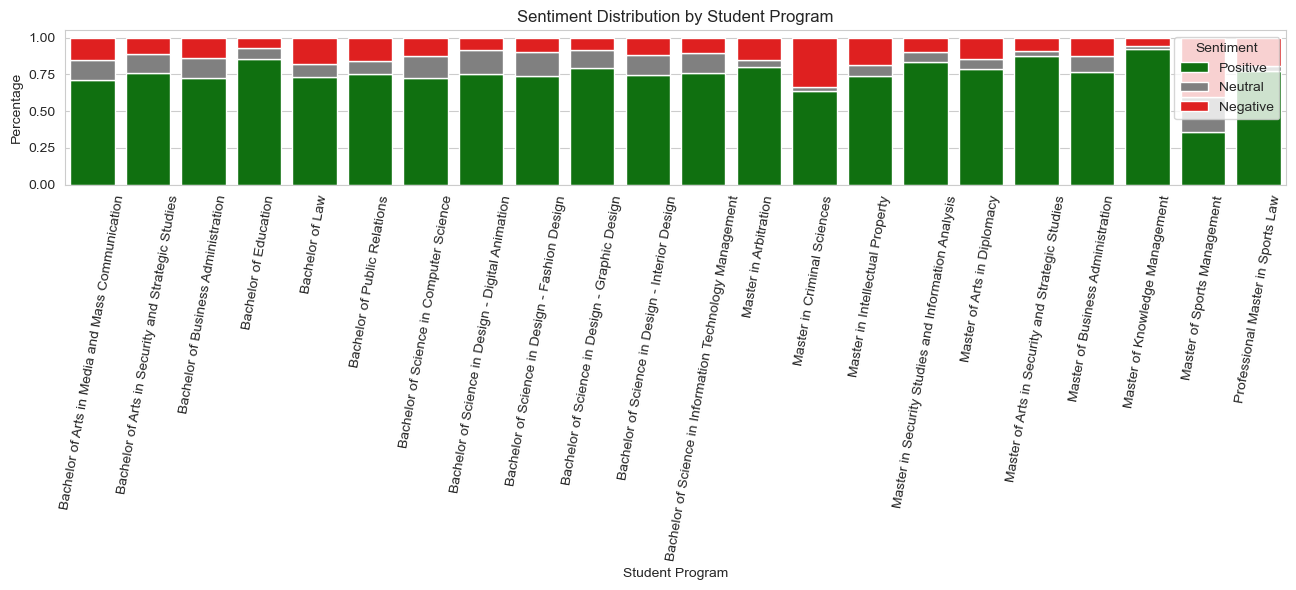

In [15]:
# Group the data by 'StudentProgram' and calculate sentiment statistics
sentiment_by_program = df.groupby('StudentProgram')['Sentiment'].value_counts(normalize=True).unstack(fill_value=0)

# Reset the index to make 'StudentProgram' a column again
sentiment_by_program = sentiment_by_program.reset_index()

# Set up the plot
plt.figure(figsize=(13, 6))
sns.set_style("whitegrid")

# Create a stacked bar chart
sns.barplot(data=sentiment_by_program, x='StudentProgram', y='positive', label='Positive', color='green')
sns.barplot(data=sentiment_by_program, x='StudentProgram', y='neutral', label='Neutral', color='gray', bottom=sentiment_by_program['positive'])
sns.barplot(data=sentiment_by_program, x='StudentProgram', y='negative', label='Negative', color='red', bottom=sentiment_by_program['neutral'] + sentiment_by_program['positive'])

# Customize the plot
plt.xlabel('Student Program')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution by Student Program')
plt.legend(title='Sentiment', loc='upper right')

# Show the plot
plt.xticks(rotation=80)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

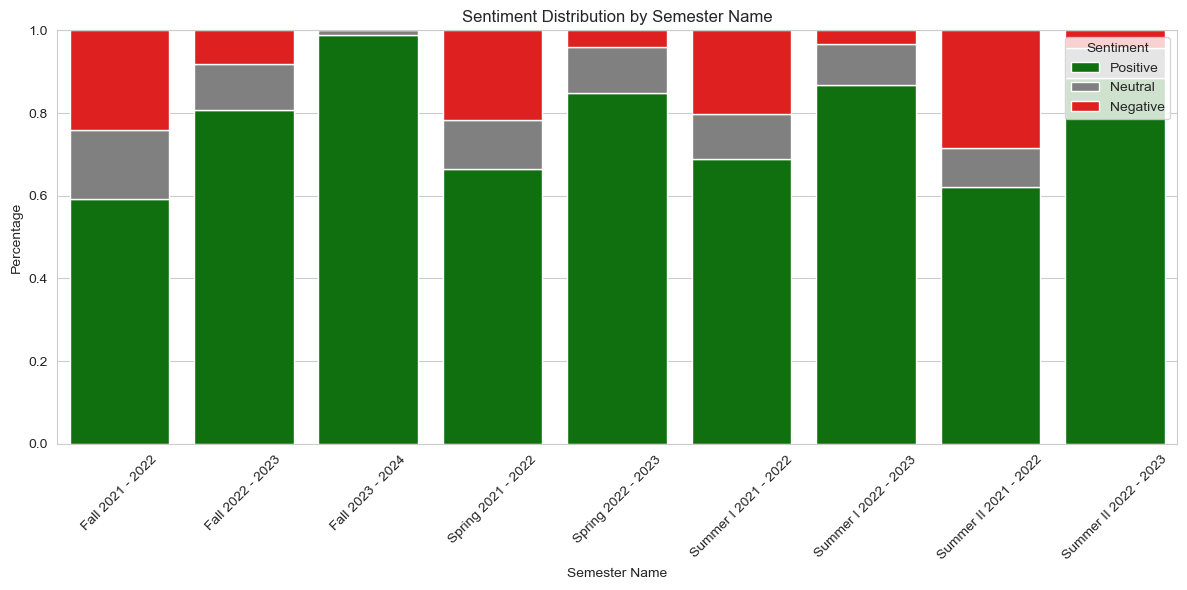

In [16]:
# Group the data by 'SemesterName' and calculate sentiment statistics
sentiment_by_semester = df.groupby('SemesterName')['Sentiment'].value_counts(normalize=True).unstack(fill_value=0)

# Reset the index to make 'SemesterName' a column again
sentiment_by_semester = sentiment_by_semester.reset_index()

# Set up the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a stacked bar chart
sns.barplot(data=sentiment_by_semester, x='SemesterName', y='positive', label='Positive', color='green')
sns.barplot(data=sentiment_by_semester, x='SemesterName', y='neutral', label='Neutral', color='gray', bottom=sentiment_by_semester['positive'])
sns.barplot(data=sentiment_by_semester, x='SemesterName', y='negative', label='Negative', color='red', bottom=sentiment_by_semester['neutral'] + sentiment_by_semester['positive'])

# Customize the plot
plt.xlabel('Semester Name')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution by Semester Name')
plt.legend(title='Sentiment', loc='upper right')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


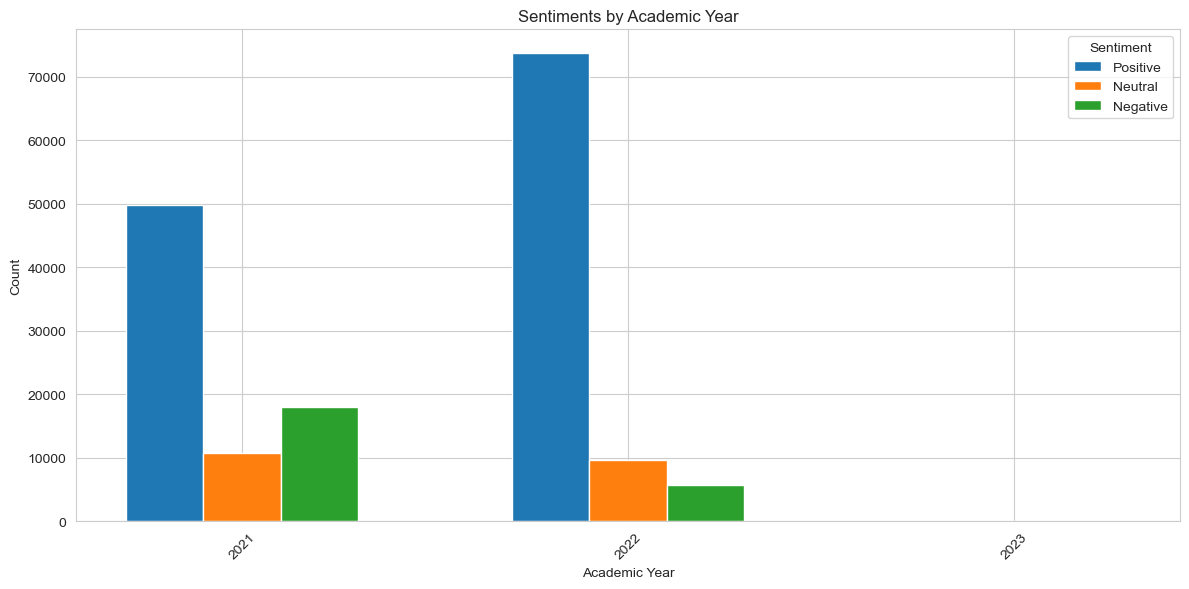

In [17]:
academic_years = df['AcademicYear'].unique()
sentiments = ['positive', 'neutral', 'negative']

# Initialize empty arrays for positive, neutral, and negative counts
positive_counts = []
neutral_counts = []
negative_counts = []

# Calculate sentiment counts for each academic year
for year in academic_years:
    sentiment_counts = df[df['AcademicYear'] == year]['Sentiment'].value_counts()
    positive_counts.append(sentiment_counts.get('positive', 0))
    neutral_counts.append(sentiment_counts.get('neutral', 0))
    negative_counts.append(sentiment_counts.get('negative', 0))

# Set the width of the bars and the positions of the bars on the x-axis
bar_width = 0.2
index = np.arange(len(academic_years))

# Create grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width, positive_counts, bar_width, label='Positive', align='center')
plt.bar(index, neutral_counts, bar_width, label='Neutral', align='center')
plt.bar(index + bar_width, negative_counts, bar_width, label='Negative', align='center')

# Customize the plot
plt.xlabel('Academic Year')
plt.ylabel('Count')
plt.title('Sentiments by Academic Year')
plt.xticks(index, academic_years, rotation=45)
plt.legend(title='Sentiment', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


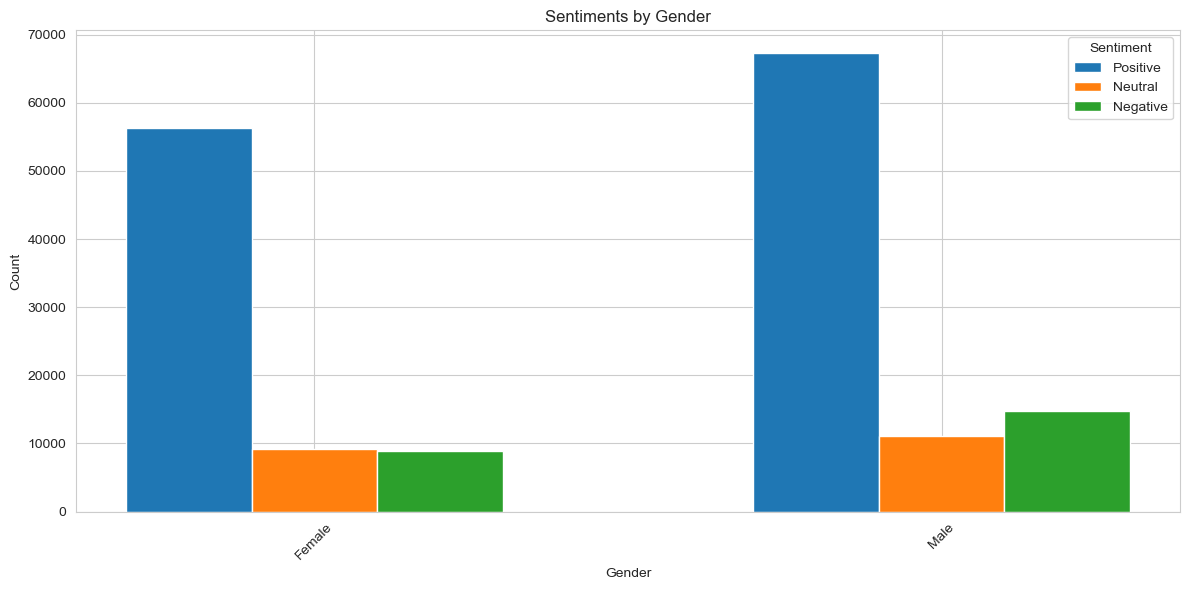

In [18]:
academic_years = df['Gender'].unique()
sentiments = ['positive', 'neutral', 'negative']

# Initialize empty arrays for positive, neutral, and negative counts
positive_counts = []
neutral_counts = []
negative_counts = []

# Calculate sentiment counts for each academic year
for year in academic_years:
    sentiment_counts = df[df['Gender'] == year]['Sentiment'].value_counts()
    positive_counts.append(sentiment_counts.get('positive', 0))
    neutral_counts.append(sentiment_counts.get('neutral', 0))
    negative_counts.append(sentiment_counts.get('negative', 0))

# Set the width of the bars and the positions of the bars on the x-axis
bar_width = 0.2
index = np.arange(len(academic_years))

# Create grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width, positive_counts, bar_width, label='Positive', align='center')
plt.bar(index, neutral_counts, bar_width, label='Neutral', align='center')
plt.bar(index + bar_width, negative_counts, bar_width, label='Negative', align='center')

# Customize the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Sentiments by Gender')
plt.xticks(index, academic_years, rotation=45)
plt.legend(title='Sentiment', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


In [19]:
# Now lets find the most negative answered question

from collections import Counter

negative_comments = df[df['Sentiment'] == 'negative']

negative_question_text = negative_comments['QuestionText']

question_frequencies = Counter(negative_question_text)

most_common_questions = question_frequencies.most_common(20)

for question, frequency in most_common_questions:
    print(f"Question: {question} - Frequency: {frequency}")

Question: The coursework and assignments are challenging - Frequency: 3832
Question: The course is relevant to my program of study - Frequency: 2624
Question: The faculty uses additional resources (other than textbook) to enhance my learning - Frequency: 2445
Question: Course learning materials are available on the portal - Frequency: 2248
Question: The faculty discussed the course syllabus at the beginning of the semester - Frequency: 2196
Question: Do you have any recommendations or suggestions about the Course that could improve your learning experience at AUE? - Frequency: 89
Question: CLO : Analyze published scientific research. - Frequency: 58
Question: CLO : Describe the process of conducting scientific research. - Frequency: 57
Question: CLO : Design an original research proposal. - Frequency: 54
Question: CLO : Apply ethical principles in conducting research. - Frequency: 54
Question: CLO : Create a portfolio industry standard and enhance employability. - Frequency: 43
Questio

In [43]:
# Now lets find the most negative answered question

from collections import Counter

negative_comments = df[df['Sentiment'] == 'positive']

negative_question_text = negative_comments['QuestionText']

question_frequencies = Counter(negative_question_text)

most_common_questions = question_frequencies.most_common(20)

for question, frequency in most_common_questions:
    print(f"Question: {question} - Frequency: {frequency}")

Question: The faculty discussed the course syllabus at the beginning of the semester - Frequency: 13731
Question: Course learning materials are available on the portal - Frequency: 13572
Question: The faculty uses additional resources (other than textbook) to enhance my learning - Frequency: 12962
Question: The course is relevant to my program of study - Frequency: 12684
Question: The coursework and assignments are challenging - Frequency: 10159
Question: Do you have any recommendations or suggestions about the Course that could improve your learning experience at AUE? - Frequency: 1236
Question: CLO : Design an original research proposal. - Frequency: 317
Question: CLO : Describe the process of conducting scientific research. - Frequency: 311
Question: CLO : Apply ethical principles in conducting research. - Frequency: 309
Question: CLO : Analyze published scientific research. - Frequency: 308
Question: CLO : 3)Apply effective strategies to complete elements of academic and profession

# Topic Modeling

In [20]:
# To better Apply a topic modeling technique we have to get out only the user comment reponses.

# Filter rows where 'QuestionType' is 'User comment'
user_comment_df = df[df['QuestionType'] == 'User Comment'][[ 'ParticipantResponse']]

# Reset the index of the new DataFrame (optional)
user_comment_df.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print(user_comment_df)

     ParticipantResponse
0                       
1                       
2                   good
3                       
4       instructor solve
...                  ...
4016             nothing
4017                  na
4018                    
4019          suggestion
4020                 nul

[4021 rows x 1 columns]


In [21]:
import re
# Remove punctuation
user_comment_df['ResponseProcesses'] = \
user_comment_df['ParticipantResponse'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
user_comment_df['ResponseProcesses'] = \
user_comment_df['ResponseProcesses'].map(lambda x: x.lower())
# Print out the first rows of papers
user_comment_df['ResponseProcesses']

0                       
1                       
2                   good
3                       
4       instructor solve
              ...       
4016             nothing
4017                  na
4018                    
4019          suggestion
4020                 nul
Name: ResponseProcesses, Length: 4021, dtype: object

In [22]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


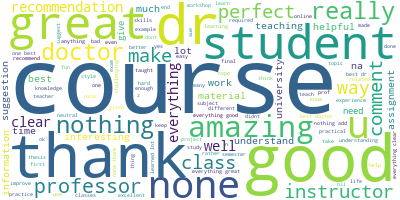

In [23]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(user_comment_df['ParticipantResponse'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [28]:
pip install gensim.utils

ERROR: Could not find a version that satisfies the requirement gensim.utils (from versions: none)
ERROR: No matching distribution found for gensim.utils
Note: you may need to restart the kernel to use updated packages.


In [38]:
import gensim
from gensim.utils import simple_preprocess

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','none','us','na', 'null', 'nil'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = user_comment_df['ResponseProcesses'].values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])


[]


In [39]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[]


In [40]:
from pprint import pprint
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.064*"course" + 0.056*"great" + 0.026*"best" + 0.021*"dr" + 0.016*"really" '
  '+ 0.015*"helpful" + 0.014*"class" + 0.011*"instructor" + 0.011*"well" + '
  '0.008*"good"'),
 (1,
  '0.057*"nothing" + 0.028*"course" + 0.026*"everything" + 0.024*"dr" + '
  '0.023*"best" + 0.019*"great" + 0.013*"thanks" + 0.012*"instructor" + '
  '0.011*"add" + 0.011*"doctor"'),
 (2,
  '0.038*"course" + 0.033*"amazing" + 0.029*"dr" + 0.023*"doctor" + '
  '0.023*"best" + 0.016*"suggestions" + 0.012*"ever" + 0.012*"way" + '
  '0.011*"time" + 0.010*"nice"'),
 (3,
  '0.041*"course" + 0.034*"dr" + 0.019*"best" + 0.016*"students" + 0.012*"one" '
  '+ 0.011*"really" + 0.010*"instructor" + 0.009*"interesting" + 0.008*"make" '
  '+ 0.007*"teach"'),
 (4,
  '0.075*"good" + 0.045*"course" + 0.038*"thank" + 0.017*"best" + 0.017*"dr" + '
  '0.017*"everything" + 0.016*"really" + 0.011*"understand" + 0.011*"great" + '
  '0.010*"students"'),
 (5,
  '0.051*"thanks" + 0.030*"thank" + 0.024*"recommendations" + 0.024*

In [41]:
# Print the topics and associated words
topics = lda_model.print_topics(num_words=10) 
for topic_id, topic in topics:
    print(f"Topic {topic_id}:")
    keywords = [word for word, _ in lda_model.show_topic(topic_id)]
    print(", ".join(keywords))
    print()

Topic 0:
course, great, best, dr, really, helpful, class, instructor, well, good

Topic 1:
nothing, course, everything, dr, best, great, thanks, instructor, add, doctor

Topic 2:
course, amazing, dr, doctor, best, suggestions, ever, way, time, nice

Topic 3:
course, dr, best, students, one, really, instructor, interesting, make, teach

Topic 4:
good, course, thank, best, dr, everything, really, understand, great, students

Topic 5:
thanks, thank, recommendations, course, perfect, great, comment, amazing, interesting, clear

Topic 6:
course, everything, comment, great, amazing, dr, doctor, class, would, clear

Topic 7:
course, good, perfect, students, everything, doctor, dr, helpful, clear, instructor

Topic 8:
course, great, everything, students, professor, dr, lot, suggestion, thanks, best

Topic 9:
good, dr, doctor, everything, best, like, really, yes, instructor, perfect



In [42]:
doc_topics = lda_model.get_document_topics(doc_bow)
print(doc_topics)

NameError: name 'doc_bow' is not defined